# given bounds

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Provided data
concentration = np.array([0.001, 2.5, 12.5, 25, 50, 150])
OD = np.array([0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + ((A - D) / (1 + (x / C)**B))

# Fit the 4PL model to the data
# params, _ = opt.curve_fit(four_param_logistic, concentration, OD)

params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=(0, [3., 3., 200., 3.]))

# Extract the fitted parameters
A, B, C, D = params


# Define the OD value we want to calculate the concentration for
OD_sample = 1.3455

# Invert the 4PL model to find the corresponding concentration for the given OD value
def inverse_four_param_logistic(OD, A, B, C, D):
    return C * ((A - OD) / (OD - D))**(1 / B)

# Calculate the concentration for the sample OD
concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)

print(concentration_sample, params)

45.2592220365041 [ 0.09636745  1.46348133 54.84155405  3.        ]


# calculate bounds

In [2]:
import numpy as np
import scipy.optimize as opt

# Provided data
concentration = np.array([0.001, 2.5, 12.5, 25, 50, 150])
OD = np.array([0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

# Automatically calculate bounds based on data
min_OD = np.min(OD)
max_OD = np.max(OD)
min_concentration = np.min(concentration)
max_concentration = np.max(concentration)

# Adjust bounds dynamically
bounds = (
    [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
    [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
)

# Fit the 4PL model to the data using dynamic bounds
params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)

# Extract the fitted parameters
A, B, C, D = params

# Define the OD value we want to calculate the concentration for
OD_sample = 1.3455

# Invert the 4PL model to find the corresponding concentration for the given OD value
def inverse_four_param_logistic(OD, A, B, C, D):
    return C * ((A - OD) / (OD - D))**(1 / B)

# Calculate the concentration for the sample OD
concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)

concentration_sample, params



(47.7504716229663,
 array([5.94095892e-02, 1.13169610e+00, 8.51478197e+01, 3.82035000e+00]))

# user input

In [4]:
import numpy as np
import scipy.optimize as opt

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

# Automatically calculate bounds based on data
min_OD = np.min(OD)
max_OD = np.max(OD)
min_concentration = np.min(concentration)
max_concentration = np.max(concentration)

# Adjust bounds dynamically
bounds = (
    [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
    [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
)

try:
    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    
    # Extract the fitted parameters
    A, B, C, D = params
    
    # Get the OD sample value from user input
    OD_sample = float(input("Enter the OD value for which you want to find the concentration: "))
    
    # Invert the 4PL model to find the corresponding concentration for the given OD value
    def inverse_four_param_logistic(OD, A, B, C, D):
        return C * ((A - OD) / (OD - D))**(1 / B)
    
    # Calculate the concentration for the sample OD
    concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
    
    print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
    print(f"Concentration for OD={OD_sample}: {concentration_sample}")

except Exception as e:
    print(f"An error occurred: {e}")


Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469
Enter the OD value for which you want to find the concentration: 1.3455
Fitted parameters: A=0.05940958915536957, B=1.1316960971837735, C=85.14781965648388, D=3.8203499999999995
Concentration for OD=1.3455: 47.7504716229663


# graphed

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469
Enter the OD value for which you want to find the concentration: 1.3455
Fitted parameters: A=0.05940958915536957, B=1.1316960971837735, C=85.14781965648388, D=3.8203499999999995
Concentration for OD=1.3455: 47.7504716229663


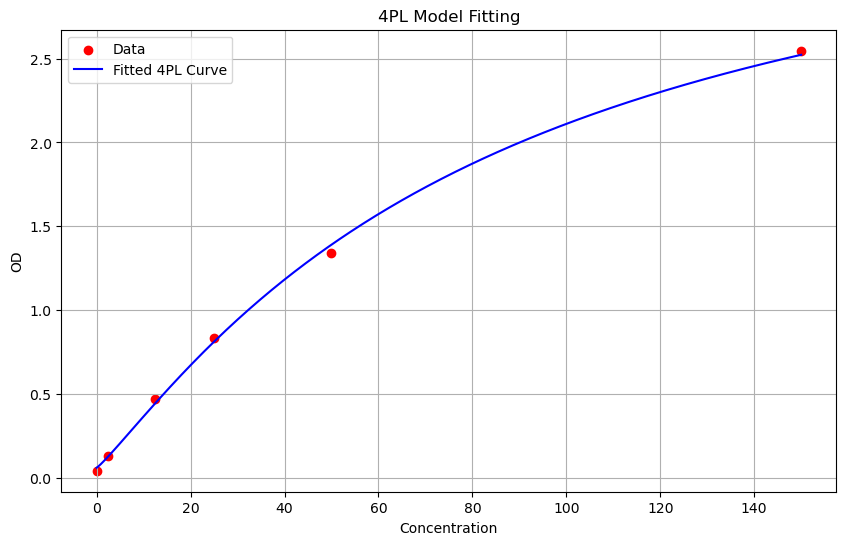

In [6]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

# Automatically calculate bounds based on data
min_OD = np.min(OD)
max_OD = np.max(OD)
min_concentration = np.min(concentration)
max_concentration = np.max(concentration)

# Adjust bounds dynamically
bounds = (
    [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
    [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
)

try:
    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    
    # Extract the fitted parameters
    A, B, C, D = params
    
    # Get the OD sample value from user input
    OD_sample = float(input("Enter the OD value for which you want to find the concentration: "))
    
    # Invert the 4PL model to find the corresponding concentration for the given OD value
    def inverse_four_param_logistic(OD, A, B, C, D):
        return C * ((A - OD) / (OD - D))**(1 / B)
    
    # Calculate the concentration for the sample OD
    concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
    
    print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
    print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    # Plot the data and the fitted curve
    x_values = np.linspace(min_concentration, max_concentration, 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


# graph before calculating OD

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469


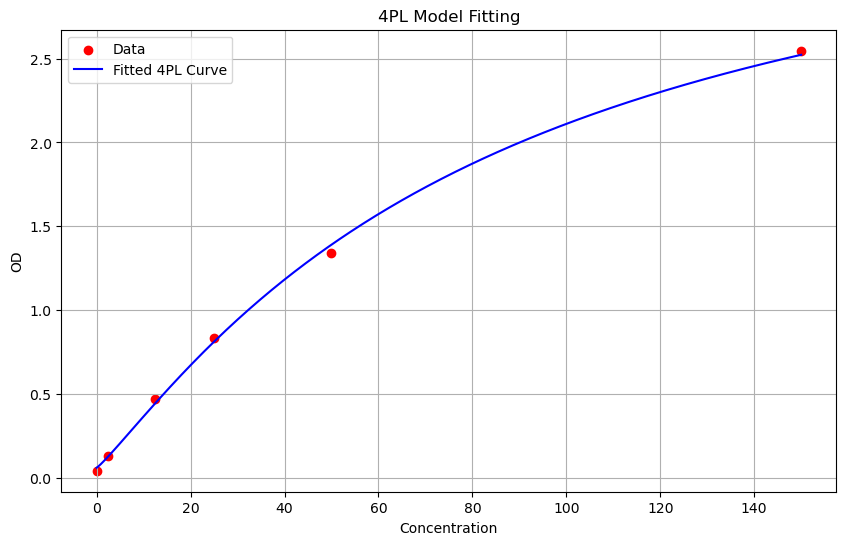

Enter the OD value for which you want to find the concentration: 1.3455
Fitted parameters: A=0.05940958915536957, B=1.1316960971837735, C=85.14781965648388, D=3.8203499999999995
Concentration for OD=1.3455: 47.7504716229663


In [5]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

# Automatically calculate bounds based on data
min_OD = np.min(OD)
max_OD = np.max(OD)
min_concentration = np.min(concentration)
max_concentration = np.max(concentration)

# Adjust bounds dynamically
bounds = (
    [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
    [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
)

try:
    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    
    # Extract the fitted parameters
    A, B, C, D = params
    
    # Plot the data and the fitted curve
    x_values = np.linspace(min_concentration, max_concentration, 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Get the OD sample value from user input
    OD_sample = float(input("Enter the OD value for which you want to find the concentration: "))
    
    # Invert the 4PL model to find the corresponding concentration for the given OD value
    def inverse_four_param_logistic(OD, A, B, C, D):
        return C * ((A - OD) / (OD - D))**(1 / B)
    
    # Calculate the concentration for the sample OD
    concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
    
    print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
    print(f"Concentration for OD={OD_sample}: {concentration_sample}")

except Exception as e:
    print(f"An error occurred: {e}")


# graph genral + graph for calc point

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469
Enter the OD value for which you want to find the concentration: 1.3455
Fitted parameters: A=0.05940958915536957, B=1.1316960971837735, C=85.14781965648388, D=3.8203499999999995
Concentration for OD=1.3455: 47.7504716229663


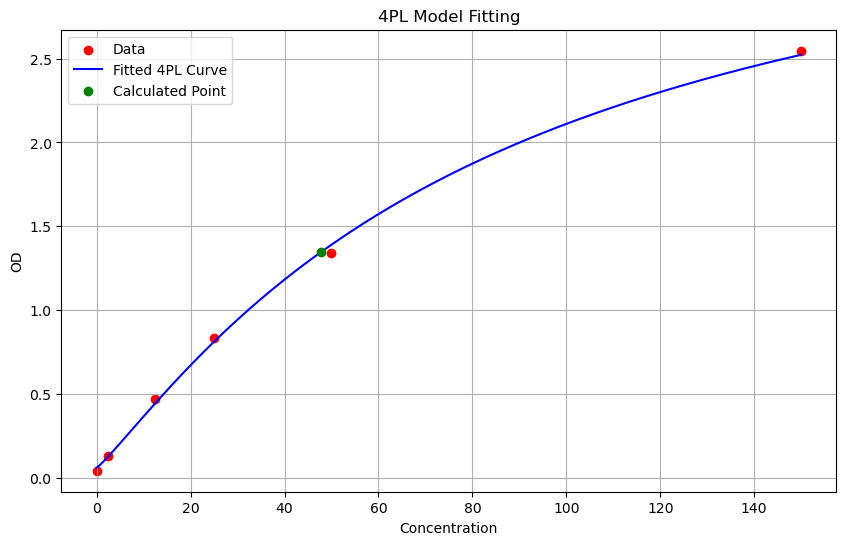

In [7]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Define the 4PL model
def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

# Automatically calculate bounds based on data
min_OD = np.min(OD)
max_OD = np.max(OD)
min_concentration = np.min(concentration)
max_concentration = np.max(concentration)

# Adjust bounds dynamically
bounds = (
    [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
    [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
)

try:
    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    
    # Extract the fitted parameters
    A, B, C, D = params

    # Plot the data and the fitted curve
    x_values = np.linspace(min_concentration, max_concentration, 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)

    # Get the OD sample value from user input
    OD_sample = float(input("Enter the OD value for which you want to find the concentration: "))
    
    # Invert the 4PL model to find the corresponding concentration for the given OD value
    def inverse_four_param_logistic(OD, A, B, C, D):
        return C * ((A - OD) / (OD - D))**(1 / B)
    
    # Calculate the concentration for the sample OD
    concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
    
    # Plot the calculated OD point
    plt.scatter(concentration_sample, OD_sample, color='green', label='Calculated Point', zorder=5)
    
    print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
    print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


# multiple calcs

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.5469


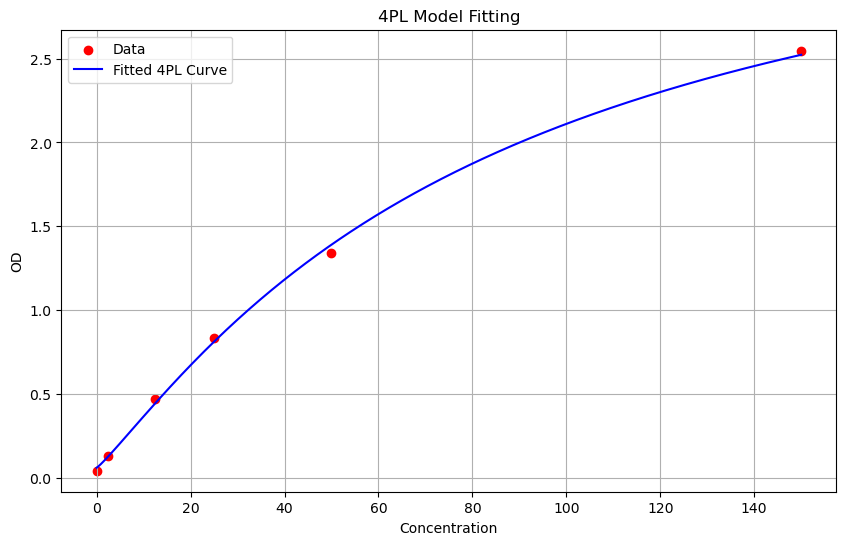

Enter the OD value for which you want to find the concentration (or type 'exit' to quit): exit


ValueError: could not convert string to float: 'exit'

In [11]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def fit_and_plot(concentration, OD):
    # Define the 4PL model
    def four_param_logistic(x, A, B, C, D):
        return D + (A - D) / (1 + (x / C)**B)

    # Automatically calculate bounds based on data
    min_OD = np.min(OD)
    max_OD = np.max(OD)
    min_concentration = np.min(concentration)
    max_concentration = np.max(concentration)

    # Adjust bounds dynamically
    bounds = (
        [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
        [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
    )

    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    A, B, C, D = params

    # Plot the data and the fitted curve
    x_values = np.linspace(min_concentration, max_concentration, 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

    return A, B, C, D

def inverse_four_param_logistic(OD, A, B, C, D):
    return C * ((A - OD) / (OD - D))**(1 / B)

while True:
    # Get concentration values from user input
    concentration_input = input("Enter corresponding concentration values separated by commas: ")
    concentration = np.array([float(value) for value in concentration_input.split(',')])

    # Get OD values from user input
    OD_input = input("Enter OD values separated by commas: ")
    OD = np.array([float(value) for value in OD_input.split(',')])

    # Fit and plot the model
    A, B, C, D = fit_and_plot(concentration, OD)

    # Get the OD sample value from user input
    OD_sample = float(input("Enter the OD value for which you want to find the concentration (or type 'exit' to quit): "))
    
    if OD_sample == 'exit':
        break

    # Calculate the concentration for the sample OD
    concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)

    # Plot the data, the fitted curve, and the calculated OD point
    x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.scatter(concentration_sample, OD_sample, color='green', label='Calculated Point', zorder=5)
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting with Calculated Point')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
    print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    # Prompt user to continue or exit
    continue_prompt = input("Do you want to enter new data or calculate another OD value? (yes to continue, no to exit): ")
    if continue_prompt.lower() != 'yes':
        break


# Final: with bound

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.0633


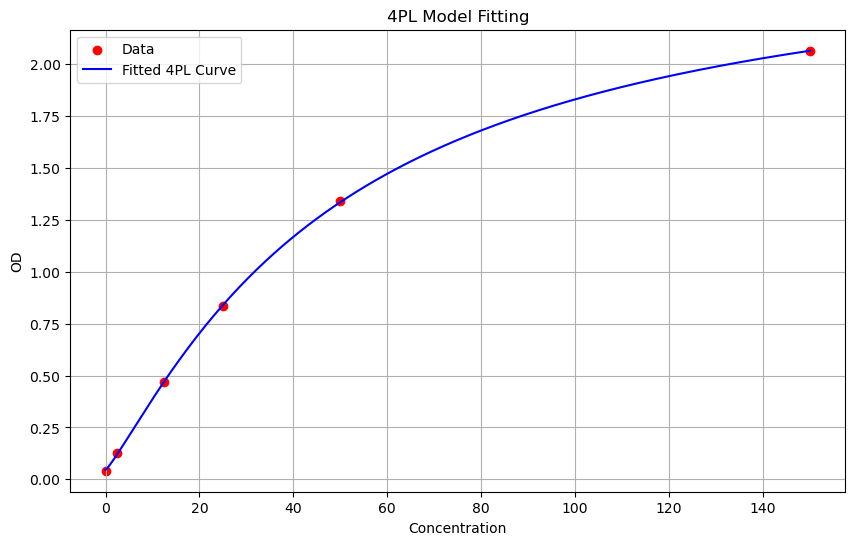

Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.5469


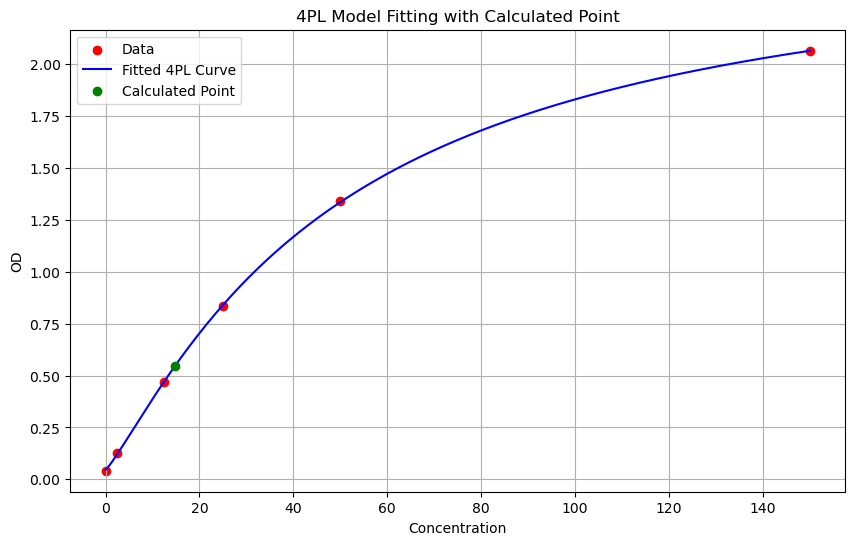

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.5469: 14.822943514210547
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 1.3455


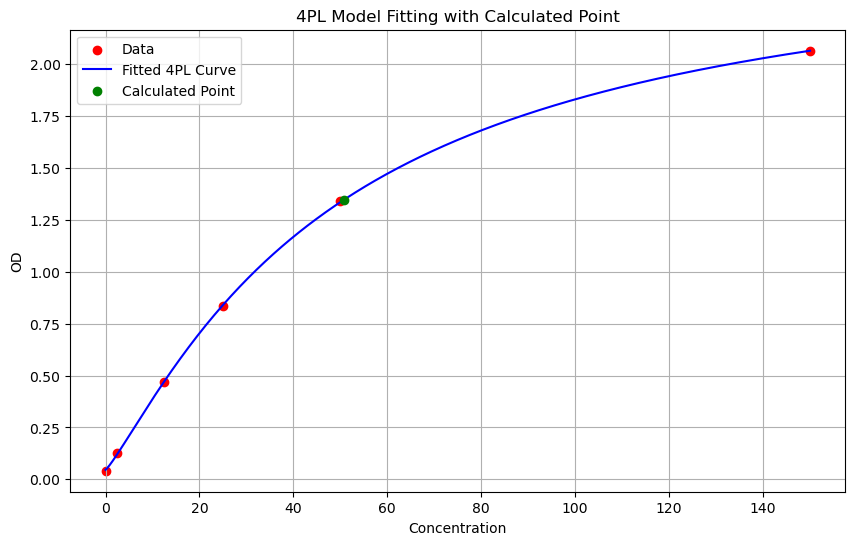

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=1.3455: 50.705654852222835
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.0433


/var/folders/6z/sk2ll27n2017jcsddsvf_yl00000gn/T/ipykernel_23098/4127575904.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return C * ((A - OD) / (OD - D))**(1 / B)


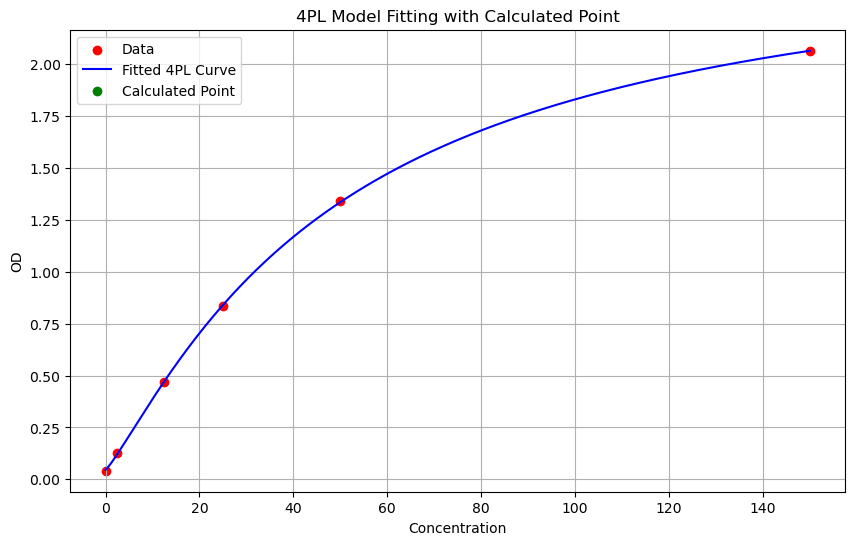

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.0433: nan
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.3977


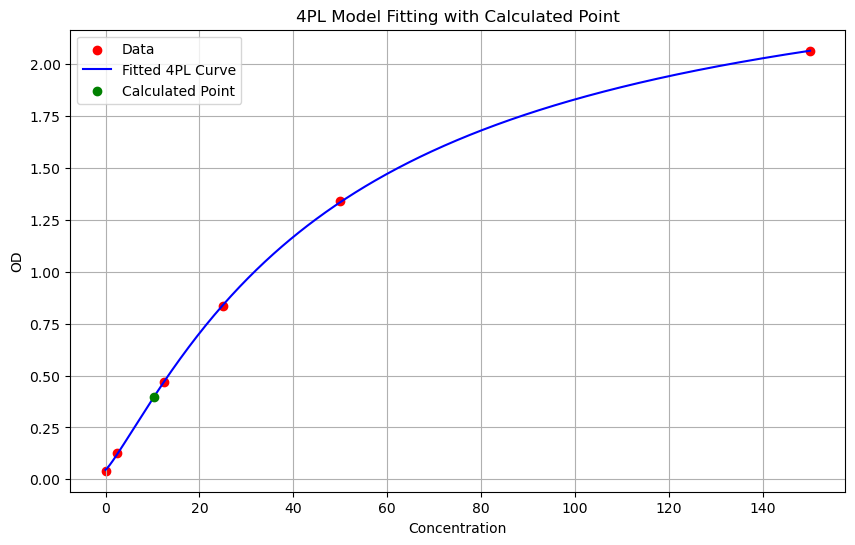

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.3977: 10.327052948878675
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.4696


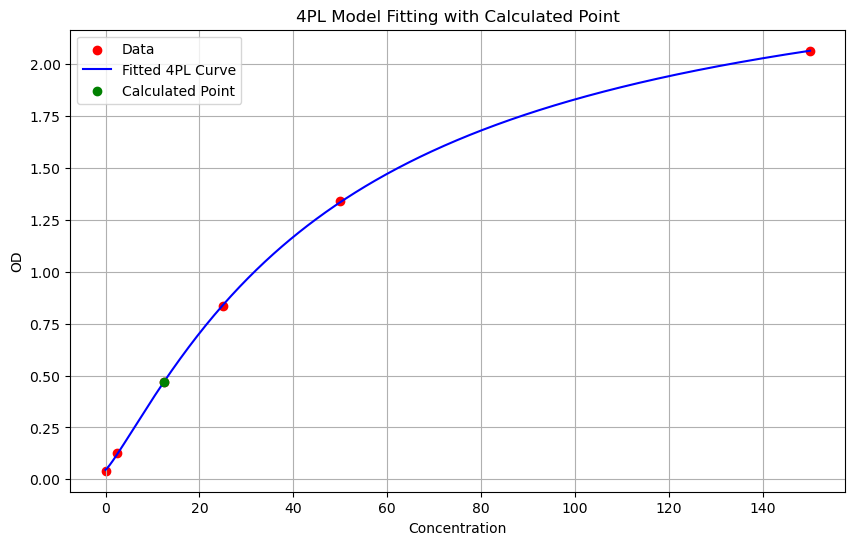

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.4696: 12.45019787428127
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): exit


In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

def inverse_four_param_logistic(OD, A, B, C, D):
    return C * ((A - OD) / (OD - D))**(1 / B)

def fit_and_plot(concentration, OD):
    # Automatically calculate bounds based on data
    min_OD = np.min(OD)
    max_OD = np.max(OD)
    min_concentration = np.min(concentration)
    max_concentration = np.max(concentration)

    # Adjust bounds dynamically
    bounds = (
        [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
        [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
    )

    # Fit the 4PL model to the data using dynamic bounds
#     params, _ = opt.curve_fit(four_param_logistic, concentration, OD)
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    A, B, C, D = params

    # Plot the data and the fitted curve
    x_values = np.linspace(min_concentration, max_concentration, 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

    return A, B, C, D

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Fit and plot the model
A, B, C, D = fit_and_plot(concentration, OD)

while True:
    # Get the OD sample value from user input
    OD_sample_input = input("Enter the OD value for which you want to find the concentration (or type 'exit' to quit): ")
    
    if OD_sample_input.lower() == 'exit':
        break

    # Convert OD sample value to float
    try:
        OD_sample = float(OD_sample_input)

        # Calculate the concentration for the sample OD
        concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
        
        # Plot the data, the fitted curve, and the calculated OD point
        x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
        y_values = four_param_logistic(x_values, A, B, C, D)

        plt.figure(figsize=(10, 6))
        plt.scatter(concentration, OD, color='red', label='Data')
        plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
        plt.scatter(concentration_sample, OD_sample, color='green', label='Calculated Point', zorder=5)
        plt.xlabel('Concentration')
        plt.ylabel('OD')
        plt.title('4PL Model Fitting with Calculated Point')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
        print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    except ValueError:
        print("Invalid OD value entered. Please try again.")


# Final: no bound

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.0633


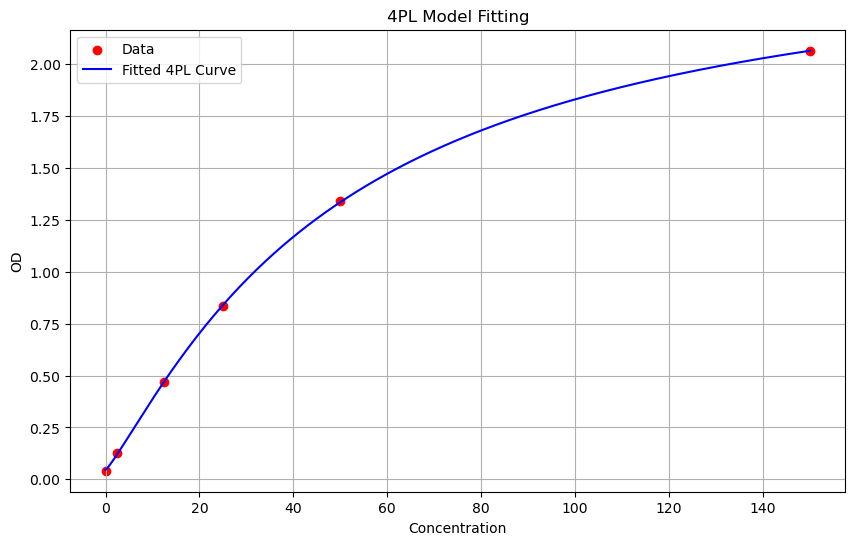

Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.5469


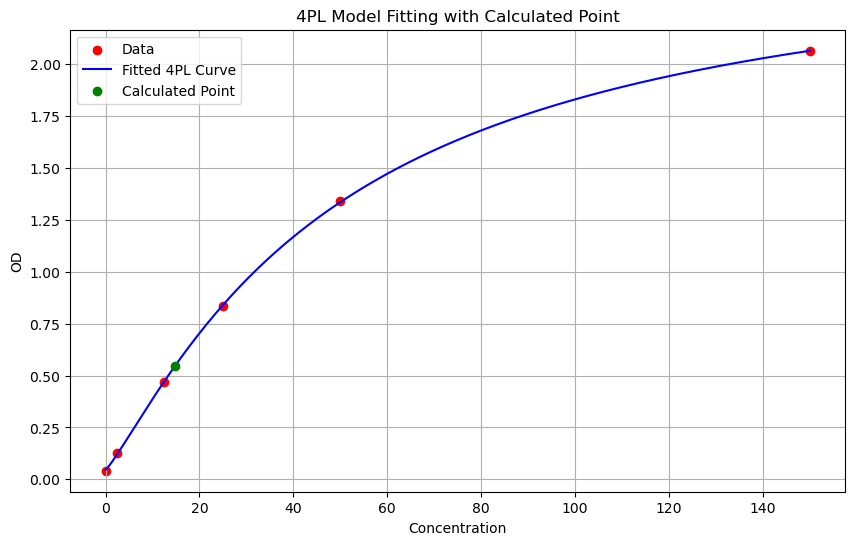

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.5469: 14.822943514210547
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 1.3455


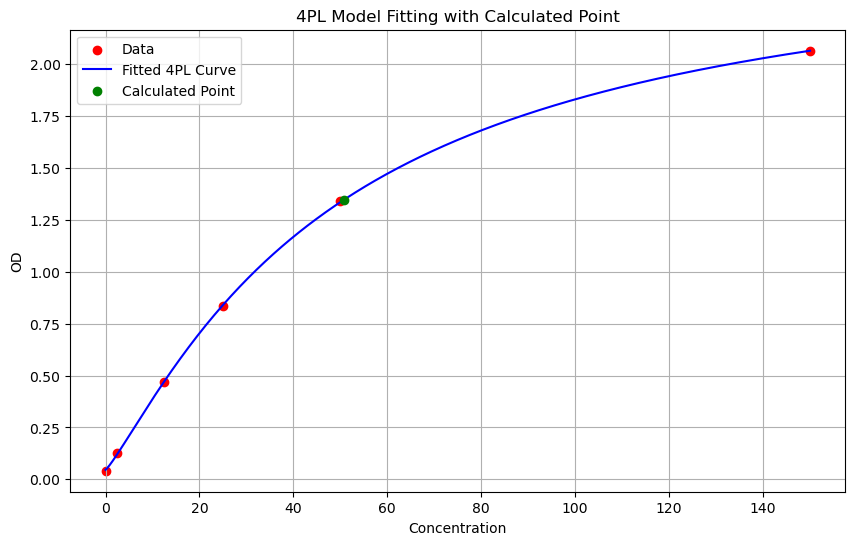

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=1.3455: 50.705654852222835
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.0433


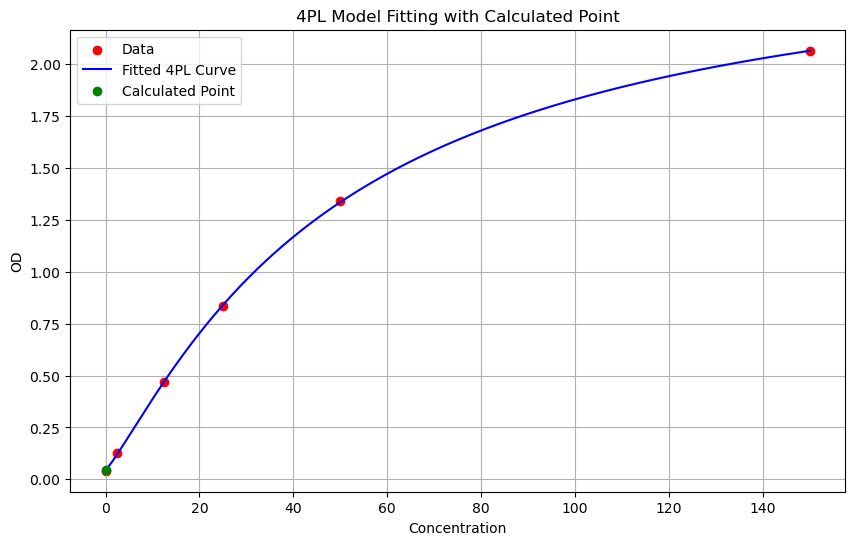

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.0433: 0.1392932482456391
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.3977


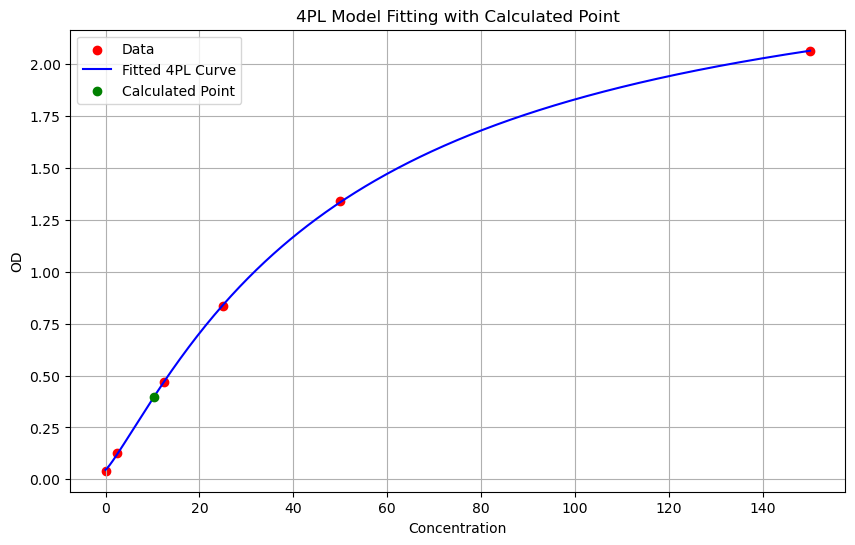

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.3977: 10.327052948878675
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.4696


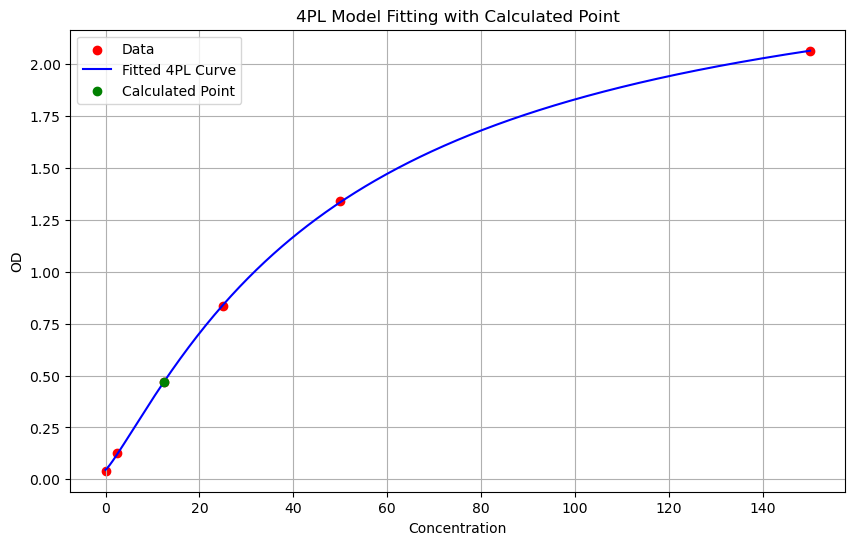

Fitted parameters: A=0.04593888805707658, B=1.1706032096925827, C=49.87635038023546, D=2.620215199850661
Concentration for OD=0.4696: 12.45019787428127


KeyboardInterrupt: Interrupted by user

In [6]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

def inverse_four_param_logistic(OD, A, B, C, D):
    # Adjust the formula to avoid NaN by using abs to prevent negative values under the root
    result = C * np.abs((A - OD) / (OD - D))**(1 / B)
    return result

def fit_and_plot(concentration, OD):
    # Automatically calculate bounds based on data
    min_OD = np.min(OD)
    max_OD = np.max(OD)
    min_concentration = np.min(concentration)
    max_concentration = np.max(concentration)

    # Adjust bounds dynamically
    bounds = (
        [min_OD * 0.5, 0.1, min_concentration * 0.5, min_OD * 0.5],  # Lower bounds
        [max_OD * 1.5, 5, max_concentration * 2, max_OD * 1.5]       # Upper bounds
    )

    # Fit the 4PL model to the data using dynamic bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD, bounds=bounds)
    A, B, C, D = params

    # Plot the data and the fitted curve
    x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

    return A, B, C, D

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Fit and plot the model
A, B, C, D = fit_and_plot(concentration, OD)

while True:
    # Get the OD sample value from user input
    OD_sample_input = input("Enter the OD value for which you want to find the concentration (or type 'exit' to quit): ")
    
    if OD_sample_input.lower() == 'exit':
        break

    # Convert OD sample value to float
    try:
        OD_sample = float(OD_sample_input)

        # Calculate the concentration for the sample OD
        concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
        
        # Plot the data, the fitted curve, and the calculated OD point
        x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
        y_values = four_param_logistic(x_values, A, B, C, D)

        plt.figure(figsize=(10, 6))
        plt.scatter(concentration, OD, color='red', label='Data')
        plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
        plt.scatter(concentration_sample, OD_sample, color='green', label='Calculated Point', zorder=5)
        plt.xlabel('Concentration')
        plt.ylabel('OD')
        plt.title('4PL Model Fitting with Calculated Point')
        plt.legend()
        
        plt.grid(True)
        plt.show()

        print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
        print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    except ValueError as e:
        print(f"An error occurred: {e}")


# no bounds

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.0633


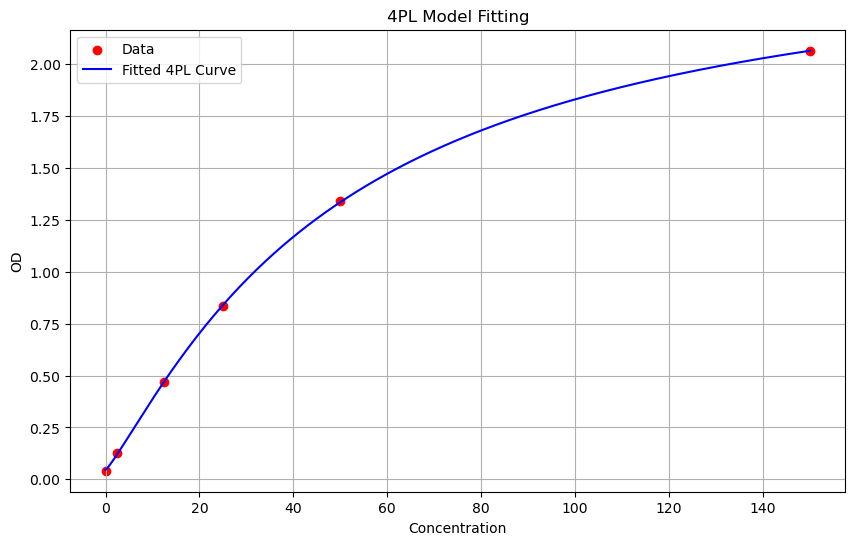

Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.5469


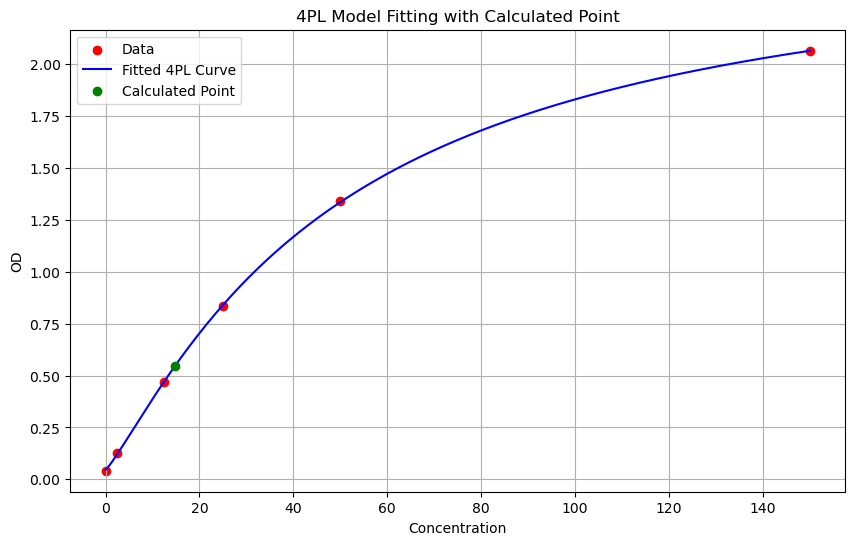

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.5469: 14.82294312083222
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 1.3455


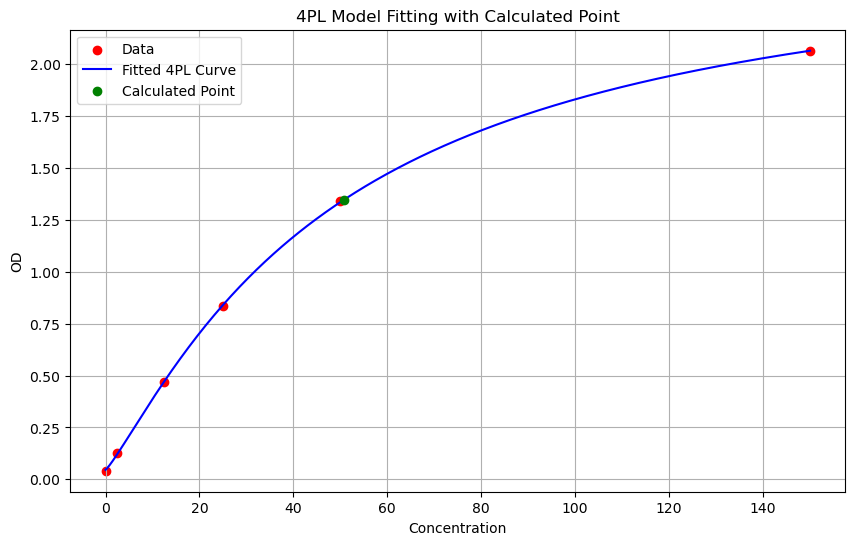

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=1.3455: 50.7056555265251
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.0433


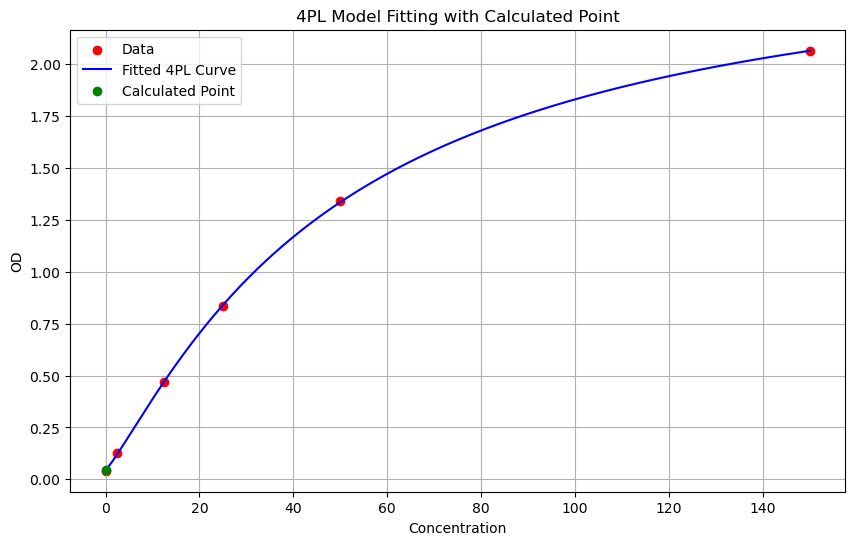

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.0433: 0.13929264638613356
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.3977


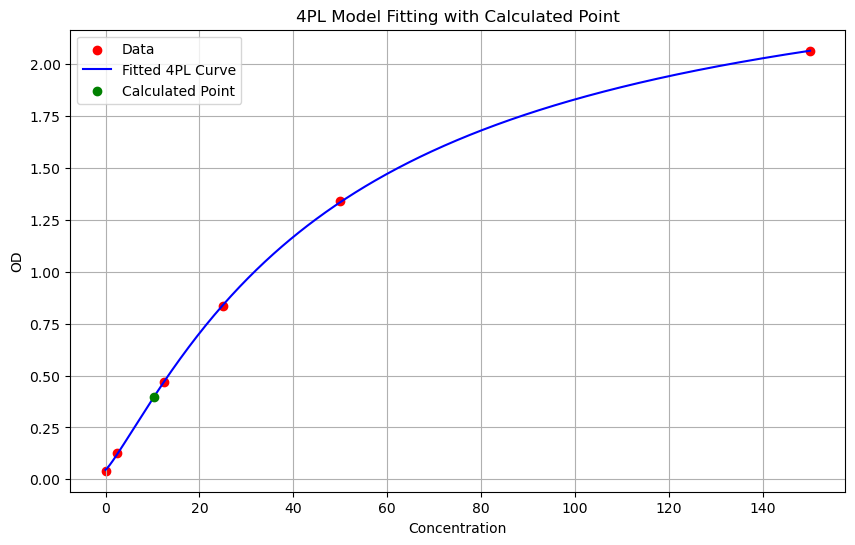

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.3977: 10.327052560262057
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.4696


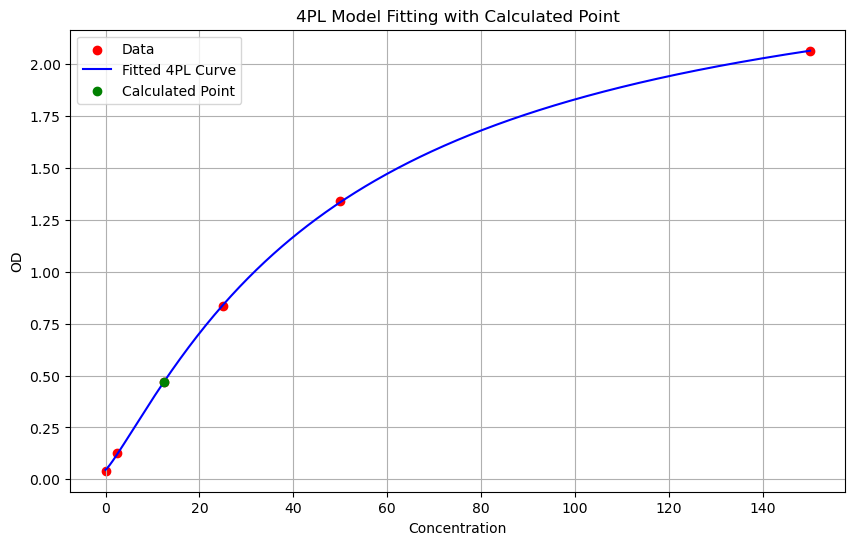

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.4696: 12.450197473086929
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): exit


In [7]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

def inverse_four_param_logistic(OD, A, B, C, D):
    # Handle negative roots by returning the absolute value of the concentration
    result = C * np.abs((A - OD) / (OD - D))**(1 / B)
    return result

def fit_and_plot(concentration, OD):
    # Fit the 4PL model to the data without bounds
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD)
    A, B, C, D = params

    # Plot the data and the fitted curve
    x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, OD, color='red', label='Data')
    plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
    plt.xlabel('Concentration')
    plt.ylabel('OD')
    plt.title('4PL Model Fitting')
    plt.legend()
    plt.grid(True)
    plt.show()

    return A, B, C, D

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Fit and plot the model
A, B, C, D = fit_and_plot(concentration, OD)

while True:
    # Get the OD sample value from user input
    OD_sample_input = input("Enter the OD value for which you want to find the concentration (or type 'exit' to quit): ")
    
    if OD_sample_input.lower() == 'exit':
        break

    # Convert OD sample value to float
    try:
        OD_sample = float(OD_sample_input)

        # Calculate the concentration for the sample OD
        concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
        
        # Plot the data, the fitted curve, and the calculated OD point
        x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
        y_values = four_param_logistic(x_values, A, B, C, D)

        plt.figure(figsize=(10, 6))
        plt.scatter(concentration, OD, color='red', label='Data')
        plt.plot(x_values, y_values, color='blue', label='Fitted 4PL Curve')
        plt.scatter(concentration_sample, OD_sample, color='green', label='Calculated Point', zorder=5)
        plt.xlabel('Concentration')
        plt.ylabel('OD')
        plt.title('4PL Model Fitting with Calculated Point')
        plt.legend()
        
        plt.grid(True)
        plt.show()

        print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
        print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    except ValueError as e:
        print(f"An error occurred: {e}")

# real final version (code)

Enter corresponding concentration values separated by commas: 0.001, 2.5, 12.5, 25, 50, 150
Enter OD values separated by commas: 0.0415, 0.1273, 0.4708, 0.8354, 1.3384, 2.0633


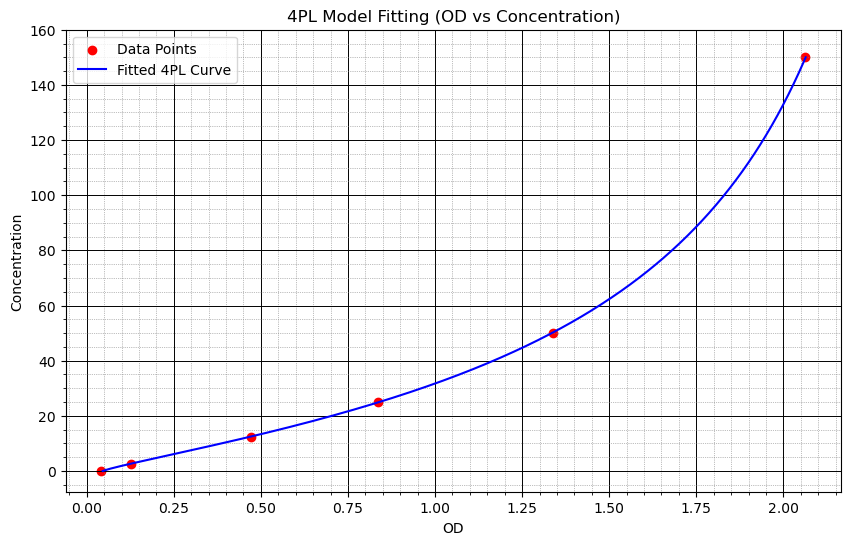

Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.5469


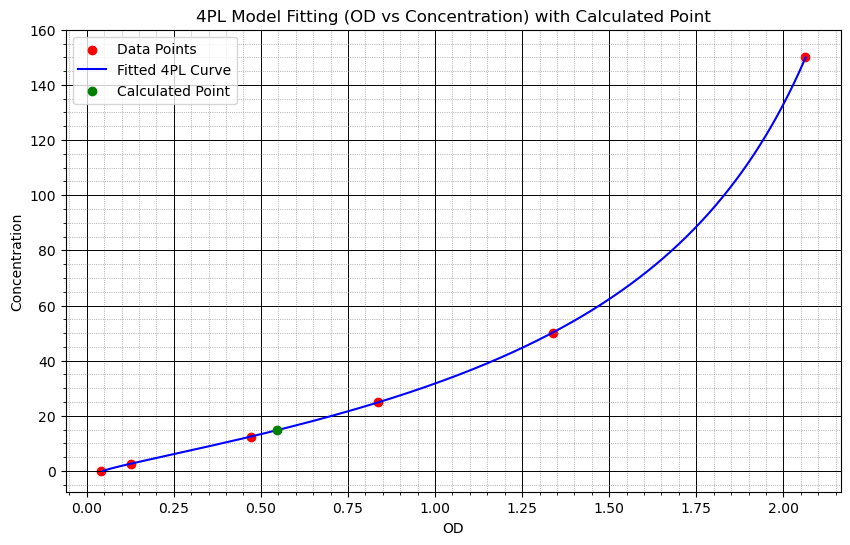

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.5469: 14.82294312083222
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 1.3455


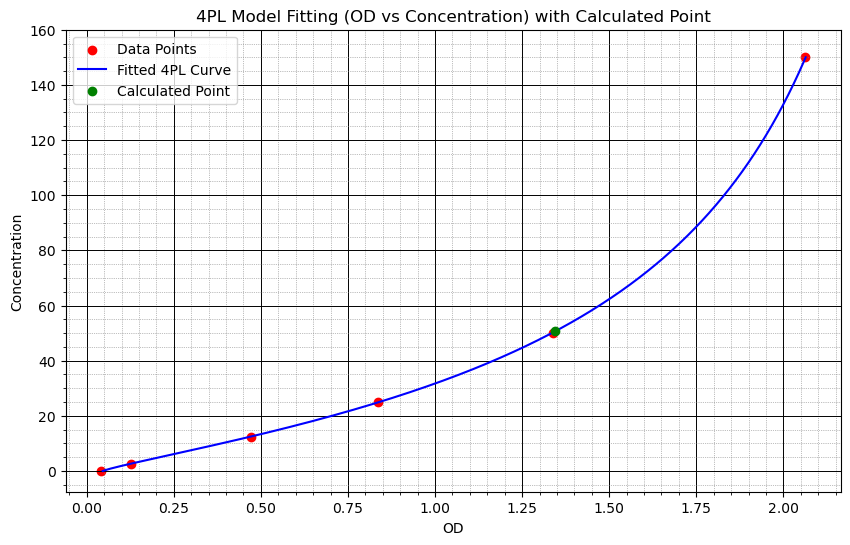

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=1.3455: 50.7056555265251
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.0433


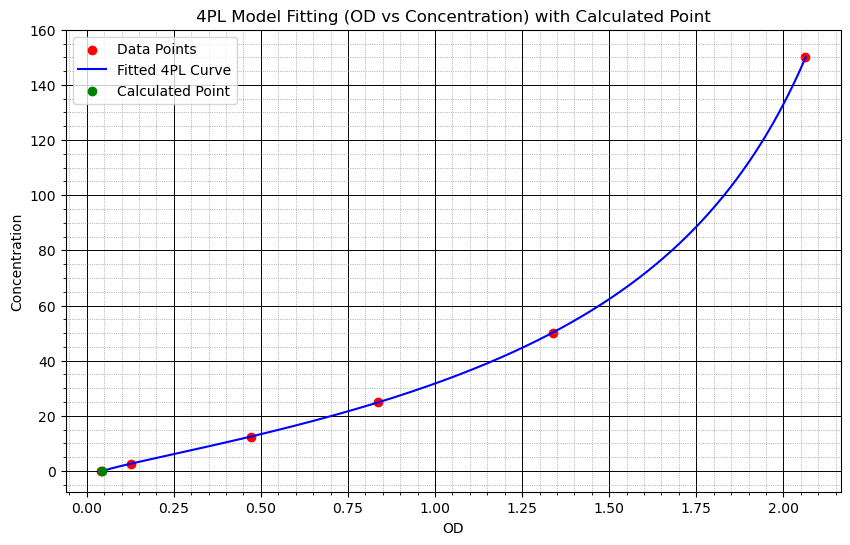

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.0433: 0.13929264638613356
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.3977


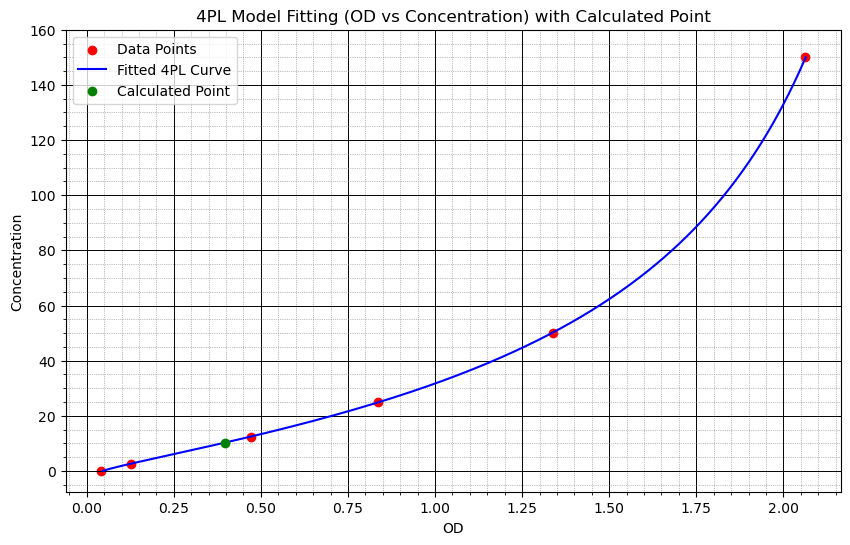

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.3977: 10.327052560262057
Enter the OD value for which you want to find the concentration (or type 'exit' to quit): 0.4696


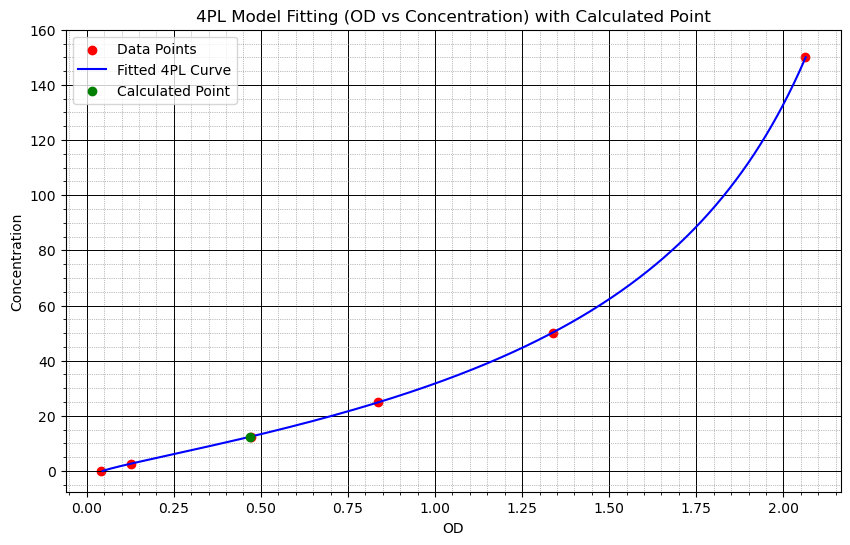

Fitted parameters: A=0.04593887573454563, B=1.1706031365235872, C=49.87635371178644, D=2.620215293304373
Concentration for OD=0.4696: 12.450197473086929


In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def four_param_logistic(x, A, B, C, D):
    return D + (A - D) / (1 + (x / C)**B)

def inverse_four_param_logistic(OD, A, B, C, D):
    # Handle negative roots by returning the absolute value of the concentration
    result = C * np.abs((A - OD) / (OD - D))**(1 / B)
    return result

def fit_and_plot(concentration, OD):
    # Fit the 4PL model to the data (keeping concentration as independent variable)
    params, _ = opt.curve_fit(four_param_logistic, concentration, OD)
    A, B, C, D = params

    # Generate x and y values for plotting (OD on x-axis, concentration on y-axis)
    x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
    y_values = four_param_logistic(x_values, A, B, C, D)

    plt.figure(figsize=(10, 6))
    plt.scatter(OD, concentration, color='red', label='Data Points')  # Plot OD on x-axis, concentration on y-axis
    plt.plot(four_param_logistic(x_values, A, B, C, D), x_values, color='blue', label='Fitted 4PL Curve')

    # Set y-axis ticks with a step of 20
    plt.yticks(np.arange(np.min(concentration), np.max(concentration) + 20, 20))

    # Enable both major and minor grid lines for the dense square grid effect
    plt.grid(True, which='major', linestyle='-', linewidth=0.7, color='black')  # Major gridlines
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')   # Minor gridlines

    plt.minorticks_on()  # Enable minor ticks to create finer grid squares

    plt.xlabel('OD')
    plt.ylabel('Concentration')
    plt.title('4PL Model Fitting (OD vs Concentration)')
    plt.legend(loc='best')
    plt.show()

    return A, B, C, D

# Get concentration values from user input
concentration_input = input("Enter corresponding concentration values separated by commas: ")
concentration = np.array([float(value) for value in concentration_input.split(',')])

# Get OD values from user input
OD_input = input("Enter OD values separated by commas: ")
OD = np.array([float(value) for value in OD_input.split(',')])

# Fit and plot the model (using the original calculation logic)
A, B, C, D = fit_and_plot(concentration, OD)

while True:
    # Get the OD sample value from user input
    OD_sample_input = input("Enter the OD value for which you want to find the concentration (or type 'exit' to quit): ")
    
    if OD_sample_input.lower() == 'exit':
        break

    # Convert OD sample value to float
    try:
        OD_sample = float(OD_sample_input)

        # Calculate the concentration for the sample OD
        concentration_sample = inverse_four_param_logistic(OD_sample, A, B, C, D)
        
        # Plot the data, the fitted curve, and the calculated OD point
        x_values = np.linspace(np.min(concentration), np.max(concentration), 500)
        y_values = four_param_logistic(x_values, A, B, C, D)

        plt.figure(figsize=(10, 6))
        plt.scatter(OD, concentration, color='red', label='Data Points')
        plt.plot(four_param_logistic(x_values, A, B, C, D), x_values, color='blue', label='Fitted 4PL Curve')
        plt.scatter(OD_sample, concentration_sample, color='green', label='Calculated Point', zorder=5)

        # Set y-axis ticks with a step of 20
        plt.yticks(np.arange(np.min(concentration), np.max(concentration) + 20, 20))

        # Enable both major and minor grid lines for the dense square grid effect
        plt.grid(True, which='major', linestyle='-', linewidth=0.7, color='black')  # Major gridlines
        plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')   # Minor gridlines

        plt.minorticks_on()  # Enable minor ticks to create finer grid squares

        plt.xlabel('OD')
        plt.ylabel('Concentration')
        plt.title('4PL Model Fitting (OD vs Concentration) with Calculated Point')
        plt.legend(loc='best')
        plt.show()

        print(f"Fitted parameters: A={A}, B={B}, C={C}, D={D}")
        print(f"Concentration for OD={OD_sample}: {concentration_sample}")

    except ValueError as e:
        print(f"An error occurred: {e}")
